In [0]:
import requests
from pyspark.sql import SparkSession
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [0]:
%pip install matplotlib seaborn

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
spark = SparkSession.builder.appName("IngestaoAPI").getOrCreate()

In [0]:
# Função para fazer a chamada à API e obter todos os dados
def obter_dados_participantes():
    url = "https://brasilapi.com.br/api/pix/v1/participants"
    resposta = requests.get(url)
    if resposta.status_code == 200:  # Verifica se a resposta é bem-sucedida
        return resposta.json()  # Retorna todos os dados como um dicionário
    else:
        print(f"Erro ao buscar dados: {resposta.status_code}")
        return None  # Retorna None em caso de erro


In [0]:
# Coletar dados dos participantes
dados_participantes = obter_dados_participantes()


In [0]:
# Verificar se os dados foram coletados com sucesso
if dados_participantes:
    # Criar DataFrame do Spark com os dados coletados
    df = spark.createDataFrame(dados_participantes)

    # Exibir DataFrame
    df.show(truncate=False)

    # Verificar o esquema do DataFrame para entender a estrutura dos dados
    df.printSchema()

    # Salvar o DataFrame transformado em um formato desejado, como Parquet
    df.write.mode("overwrite").parquet("/mnt/dados/pix_participantes.parquet")

+------------------------+--------+-----------------------+--------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------+-----------------+
|inicio_operacao         |ispb    |modalidade_participacao|nome                                                                                                                                  |nome_reduzido                                  |tipo_participacao|
+------------------------+--------+-----------------------+--------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------+-----------------+
|2020-11-03T09:30:00.000Z|00000000|PDCT                   |BANCO DO BRASIL S.A.                                                                                                                  |BCO DO BRASIL S.A.     

In [0]:
# Criar relatórios
# Converter DataFrame do Spark para pandas
df_pandas = df.toPandas()

# Criar um relatório simples
relatorio = df_pandas.describe(include='all')  # Relatório que inclui todas as colunas

# Exibir o relatório
print(relatorio)


                 inicio_operacao      ispb modalidade_participacao  \
count                        842       842                     842   
unique                       209       842                       3   
top     2020-11-03T09:30:00.000Z  00000000                    PDCT   
freq                         632         1                     838   

                        nome       nome_reduzido tipo_participacao  
count                    842                 842               842  
unique                   842                 842                 2  
top     BANCO DO BRASIL S.A.  BCO DO BRASIL S.A.              IDRT  
freq                       1                   1               677  


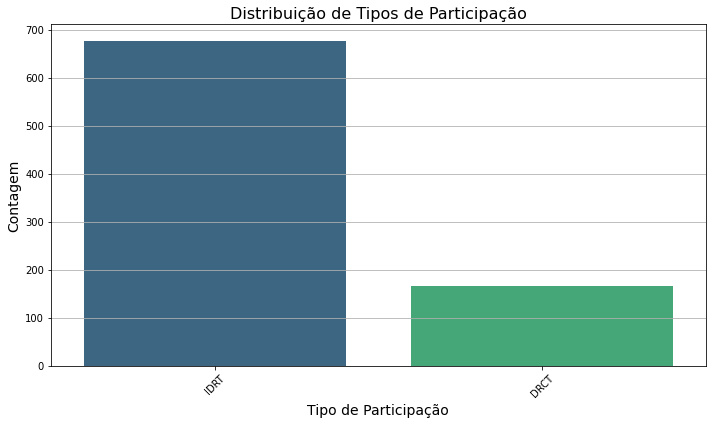

In [0]:
# Supondo que df_pandas seja seu DataFrame convertido do Spark
# e que já contenha os dados que você descreveu anteriormente

# Criar um DataFrame com a contagem de tipos de participação
contagem_tipo_participacao = df_pandas['tipo_participacao'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_tipo_participacao.index, y=contagem_tipo_participacao.values, palette='viridis')

# Configurar os títulos e rótulos
plt.title('Distribuição de Tipos de Participação', fontsize=16)
plt.xlabel('Tipo de Participação', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()